## Imports

In [1]:
import numpy as np
import generator as g
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import plots
import matplotlib.pyplot as plt

%matplotlib inline

## Funções de Limiares

Podem ser utilizada na predição caso os dados não sejam normalizados para saída do problema

In [2]:
same = lambda x: x
# tupla(x,limit)
threshold = lambda x: np.where(x[0]>x[1], 1, 0) 

## Funções de Ativação

Todas as funções de ativação possíveis para rede neural deste notebook

In [3]:
# Sigmoid: saída entre [0,1]
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1 - y)
    return 1.0/(1.0 + np.exp(-x))

In [4]:
# Tangente Hiperbólica: saída entre [-1,1]
def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [5]:
# Retificadora (Relu): saída 0 caso entrada seja negativa e maior que 1 caso contrário
def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

In [6]:
# Degrau: saída 0 se menor que 0 e saída 1 caso contrário
def step(x,derivative=False):
    if derivative:
        return np.where(x>0,1,1)
    return np.where(x>0,1,0)

In [7]:
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

## Funções auxiliares

In [8]:
def softmax(x, y_oh=None, derivative=False):
    if derivative: 
        y_pred = softmax(x)
        y_correct = np.argmax(y_oh, axis=1)
        pk = y_pred[range(y_pred.shape[0]), y_correct]
        y_pred[range(y_pred.shape[0]), y_correct] = pk*(1.0 - pk)
        return y_pred
    exp = np.exp(x)
    return exp/np.sum(exp, axis=1, keepdims=True)

In [9]:
def neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_correct = np.argmax(y_oh, axis=1)
    pk = y_pred[range(y_pred.shape[0]), y_correct]
    if derivative:
        y_pred[range(y_pred.shape[0]), y_correct] = (-1.0/pk)
        return y_pred
    return np.mean(-np.log(pk))

## Funções de custo

In [10]:
def mse(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred)
    return np.mean((y - y_pred)**2)

In [11]:
def sigmoid_cross_entropy(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred)
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [12]:
def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    y_correct = np.argmax(y_oh, axis=1)
    pk = y_softmax[range(y_softmax.shape[0]), y_correct]
    if derivative:
        return -(y_oh - y_softmax)/y_oh.shape[0]
    return np.mean(-np.log(pk))

## Questões

1) A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma rede de Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. Para
solução do problema defina antes um conjunto de treinamento e um conjunto de validação.
Dica: O problema pode ser formulado como um problema de classificação de 8 padrões
diferentes, sendo que cada padrão representa um vértice do cubo.

In [13]:
# entradas
x,y = g.data_1A1(30000,dtype='train')
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=6000, stratify=y, random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(24000, 3) (6000, 3) (24000, 8) (6000, 8)


In [14]:
class OneLayer:
    def __init__(self):
        self.learning_rate = 0.02
        self.w = np.random.random((8, 3))-0.5
        self.b = np.zeros(8)
        self.history = { 'errors': [], 'epoch': [] }

    def forward(self, x_i):
        y = np.dot(x_i, self.w.T) + self.b
        return step(y)

    def fit(self, x,y, epochs=100):
        for e in range(epochs):
             for x_i, y_i in zip(x,y):
                x_i =  x_i.reshape(1, x.shape[1])
                y_pred = self.forward(x_i)
                error = y_i-y_pred
                # log
                self.history['errors'].append(np.sum(np.where(error!=0,1,0)))
                self.history['epoch'].append(e)
                self.w = self.w + self.learning_rate*np.dot(error.T, x_i)
                self.b = self.b + self.learning_rate*error[0]

    def predict(self, x_val):
        y_pred = []
        for x in x_val:
            x_i =  x.reshape(1, x_val.shape[1])
            y_pred.append(self.forward(x_i)[0])
        return np.array(y_pred)

w: [[-0.13455654 -0.02089922 -0.46802362]
 [-0.04762193 -0.14924393  0.01137909]
 [-0.14934217  0.00284647 -0.37056944]
 [-0.28592217  0.05444558  0.02446567]
 [ 0.00657117 -0.34598997 -0.20897483]
 [ 0.01636182 -0.40528899  0.01548214]
 [ 0.02098584  0.24934777 -0.16196318]
 [ 0.16713964  0.05046583  0.04512711]]
b: [  2.00000000e-02  -6.93889390e-18  -6.93889390e-18  -6.00000000e-02
  -6.93889390e-18  -2.00000000e-02  -2.60000000e-01  -2.60000000e-01]
accurancy:  1.0


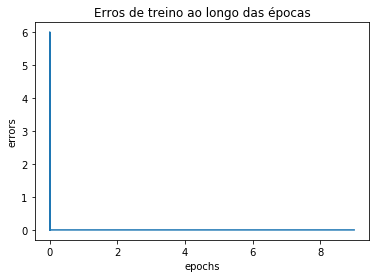

In [149]:
one = OneLayer()
one.fit(x_train, y_train, epochs=10)

print('w:', one.w)
print('b:', one.b)
print('accurancy: ', accuracy_score(y_val, one.predict(x_val)))

plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(one.history['epoch'],one.history['errors'])
plt.show()

2) Implemente uma rede perceptron de múltiplas camadas treinando-a com os seguintes
algoritmos:

a) algoritmo da retropropagação em modo estocástico usando a regra delta;

b) algoritmo da retropropagação em modo por lote usando a regra delta;

c) algoritmo da retropropagação usando a regra delta com termo do momento;

In [27]:
class Layer:
    def __init__(self, input_dim, output_dim, activation=step, use_bias=True):
        self.input = None
        self.weights = np.random.randn(output_dim, input_dim)
        self.bias = np.random.randn(1, output_dim)
        self.activation = activation
        self._activ_inp, self._activ_out = None, None
        self.input_dim = input_dim
        self.use_bias = use_bias
        self.dweights, self.dbias = None, None
        self._dweights, self._dbias, self._prev_dweights = None, None, 0.0

In [28]:
class NeuralNetwork:
    def __init__(self, cost_func=mse, learning_rate=1e-3, momentum=0.0):
        self._layers = []
        self.cost_func = cost_func
        self._learning_rate = learning_rate
        self.momentum = momentum
    
    def __backpropagation(self, y,y_pred):
        last_delta = self.cost_func(y, y_pred, derivative=True)
        for layer in reversed(self._layers):
            dactivation = layer.activation(layer._activ_inp, derivative=True)*last_delta
            last_delta = np.dot(dactivation, layer.weights)
            layer.dweights = np.dot(dactivation.T, layer.input)
            layer.dbias = 1.0*dactivation.sum(axis=0, keepdims=True)
        
        for layer in reversed(self._layers):
            layer._prev_dweights = -self._learning_rate*layer.dweights + self.momentum*layer._prev_dweights
            layer.weights = layer.weights + layer._prev_dweights
            layer.biases = layer.bias - self._learning_rate*layer.dbias
    
    def __forward(self, x):
        self._layers[0].input = x
        for current_layer, next_layer in zip(self._layers, self._layers[1:] + [Layer(0,0)]):
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.bias
            current_layer._activ_inp = y
            current_layer._activ_out = next_layer.input = current_layer.activation(y)
        return self._layers[-1]._activ_out

    def add(self, layer):
        self._layers.append(layer)
    
    def evaluate(self,y_pred, y, func=same, dtype=int):
        score = 0
        total = 100.0/y.shape[0]
        # mesmo tipo de saida
        y_pred = y_pred.astype(dtype)
        y = y.astype(dtype)

        for y_i, y_pred_i in zip(y,y_pred):
            y_pred_i = func(y_pred_i)
            if np.array_equal(y_i,y_pred_i):
                score+=1
        return score*total

    def fit(self, X=None, Y=None, epochs=1, batch_size=None, verbose=False):
        batch_size = X.shape[0] if batch_size is None else batch_size
        n_batches = X.shape[0] // batch_size
        
        for step in range(epochs+1):
            # treino cada batch
            for batch in range(n_batches):
                offset = batch_size * batch
                # conjunto de treinamento por batch
                X_batch, Y_batch = X[offset:offset+batch_size], Y[offset:offset+batch_size]

                y_pred = self.__forward(X)
                self.__backpropagation(Y, y_pred)
            
    def get_learning_rate(self):
        return self._learning_rate

    def get_weights(self):
        return self._layers[-1].weights, self._layers[-1].bias

    def predict(self, X, verbose=False):
        return self.__forward(X)

## a)

In [30]:
x,y = g.data_1A1(500,dtype='train')
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=100, stratify=y, random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(400, 3) (100, 3) (400, 8) (100, 8)


In [39]:
D_in, D_out = x_train.shape[1], y_train.shape[1]
model = NeuralNetwork(momentum=0.9)
model.add(Layer(input_dim=D_in, output_dim=D_out, activation=step))
model.add(Layer(input_dim=8, output_dim=8, activation=step))
model.fit(x_train, y_train, batch_size=20, epochs=5, verbose=False)

w,b = model.get_weights()
y_pred = model.predict(x_val, verbose=False)
accurancy = model.evaluate(y_pred, y_val, func=same)

print('w:', w)
print('b:', b)
print('Accurancy: {0:.1f}%'.format(accurancy))


w: [[-1.32067618 -0.89913887  2.76427821 -2.95870605 -1.5008244  -1.28499942
  -0.49214606 -1.38385164]
 [-1.00112603  3.30244162 -3.33575855 -0.61681544 -0.26500269 -0.00746412
   0.3287701  -0.07927603]
 [ 0.80433659 -0.82217466 -1.37097015 -2.4126448   1.52415484  2.53347253
  -1.94329324 -2.41603094]
 [ 0.31194787 -2.03379781 -4.14945032 -1.04844697 -2.36449866 -1.55716159
   0.09705121 -1.19558674]
 [-1.21663879 -1.15063688  1.30578249 -1.27823266  1.05209662  1.11903525
  -1.02085298  0.3277377 ]
 [-2.19565885 -0.78857227 -1.09749239  1.29102482 -2.98850839 -0.43669035
   0.48810422 -1.37308397]
 [-3.2961962  -1.69281336 -1.10280604 -0.42464804  0.35448259 -2.46599946
  -1.17811091 -1.54091744]
 [-0.06239666 -2.64714745 -3.67728796 -1.04467868 -2.31335715 -0.82197783
  -2.88427012 -0.97976583]]
b: [[-0.68882168 -0.51361093  0.81962958  0.74707573 -0.55134413 -0.18876588
   0.07107767  1.24309091]]
Accurancy: 48.0%


In [32]:
accuracy_score(y_val, y_pred)

1.0

## 3 Questão

In [41]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)

(4, 2) (4, 1)


Predições:
[[0.1098623 ]
 [0.77493887]
 [0.77496628]
 [0.48376263]]
Accurancy: 48.0%


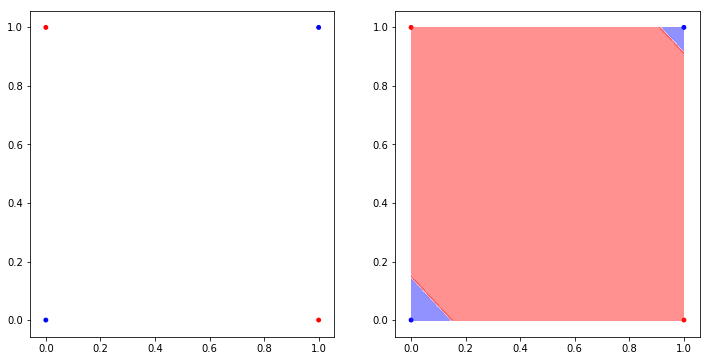

In [55]:
D_in, D_out = x.shape[1], y.shape[1]
model = NeuralNetwork(cost_func=sigmoid_cross_entropy, learning_rate=1.0)
model.add(Layer(input_dim=D_in, output_dim=2, activation=sigmoid))
model.add(Layer(input_dim=2, output_dim=D_out, activation=sigmoid))

model.fit(x, y, epochs=1000)
y_pred = model.predict(x)
print('Predições:', y_pred, sep='\n')
print('Accurancy: {0:.1f}%'.format(accurancy))
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Questão 4

In [66]:
x = np.loadtxt('../data/04_x.txt', delimiter=',')
y = np.loadtxt('../data/04_y.txt', delimiter=',').reshape(-1,1)
x.shape, y.shape

((7796, 2), (7796, 1))

In [84]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)
y_oh = onehot.fit_transform(y)
y_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [116]:
D_in, D_out = x.shape[1], y_oh.shape[1]

model = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-1, momentum=0.9)
model.add(Layer(input_dim=D_in, output_dim=20, activation=linear))
model.add(Layer(input_dim=20, output_dim=D_out, activation=linear))

model.fit(X=x, Y=y_oh, epochs=5000, verbose=100)

In [117]:
y_pred = model.predict(x).argmax(axis=1)

y_pred.shape
accuracy_score(y, y_pred)

0.9961518727552591

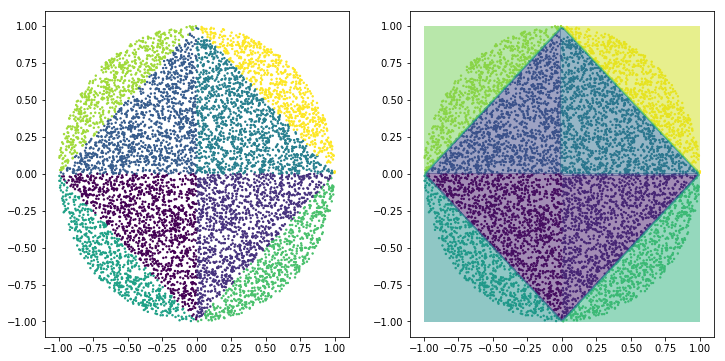

In [118]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model, s=2)